In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import os
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

In [17]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data\\Grace'


In [18]:
files = glob.glob(f"{data_folder}\\*.txt")
files

['C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\Grace\\CNESGRGS RL05 10d.txt',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\Grace\\CNESGRGS RL05 monthly.txt',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\Grace\\COST-G RL01 monthly.txt',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\Grace\\JPL RL06 monthly solutions.txt']

In [24]:
cnes_grgs = pd.read_csv(files[1], skiprows=45, skipinitialspace=True, delimiter=' ', index_col=['Time (years)'],
                        names=['Time (seconds since 1970/01/01)', 'Time (days since 1950/01/01)','Time (years)', 'Equivalent Water Heights (cm)',
                               'Linear model (cm)', 'Periodic model (cm)'])
cost_g = pd.read_csv(files[2], skiprows=45, skipinitialspace=True, delimiter=' ', index_col=['Time (years)'],
                        names=['Time (seconds since 1970/01/01)', 'Time (days since 1950/01/01)','Time (years)', 'Equivalent Water Heights (cm)',
                               'Linear model (cm)', 'Periodic model (cm)'])
jpl = pd.read_csv(files[3], skiprows=45, skipinitialspace=True, delimiter=' ', index_col=['Time (years)'],
                        names=['Time (seconds since 1970/01/01)', 'Time_days_since','Time (years)', 'Equivalent Water Heights (cm)',
                               'Linear model (cm)', 'Periodic model (cm)'])


In [57]:
from datetime import timedelta

jpl['Time days'] = jpl.apply(lambda x: pd.Timestamp('1950-01-01') + timedelta(x.Time_days_since), axis=1)
jpl_1 = jpl.copy()
jpl_1.set_index(['Time days'], inplace=True)
jpl_1.drop(inplace=True, columns=['Time (seconds since 1970/01/01)', 'Time_days_since', 'Linear model (cm)', 'Periodic model (cm)'])
jpl_1['Storage [mm]'] = jpl_1['Equivalent Water Heights (cm)'] * 10
jpl_1.drop(inplace=True, columns=['Equivalent Water Heights (cm)'])
jpl_1.to_parquet(f'{data_folder}\\jplStorage.parquet')
jpl_1

,Storage [mm]
Time days,
2002-05-10 12:00:00,21.03
2002-06-16 00:00:00,NaN
2002-07-16 12:00:00,NaN
2002-08-16 12:00:00,-114.97
2002-09-16 00:00:00,-167.43
...,...
2022-05-16 12:00:00,56.70
2022-06-16 00:00:00,-39.54
2022-07-16 12:00:00,-76.99


DatetimeIndex(['2002-05-10 12:00:00', '2002-06-16 00:00:00',
               '2002-07-16 12:00:00', '2002-08-16 12:00:00',
               '2002-09-16 00:00:00', '2002-10-16 12:00:00',
               '2002-11-16 00:00:00', '2002-12-16 12:00:00',
               '2003-01-16 12:00:00', '2003-02-15 00:00:00',
               ...
               '2021-12-16 12:00:00', '2022-01-16 12:00:00',
               '2022-02-15 00:00:00', '2022-03-16 12:00:00',
               '2022-04-16 00:00:00', '2022-05-16 12:00:00',
               '2022-06-16 00:00:00', '2022-07-16 12:00:00',
               '2022-08-16 12:00:00', '2022-09-16 00:00:00'],
              dtype='datetime64[ns]', name='Time days', length=245, freq=None)

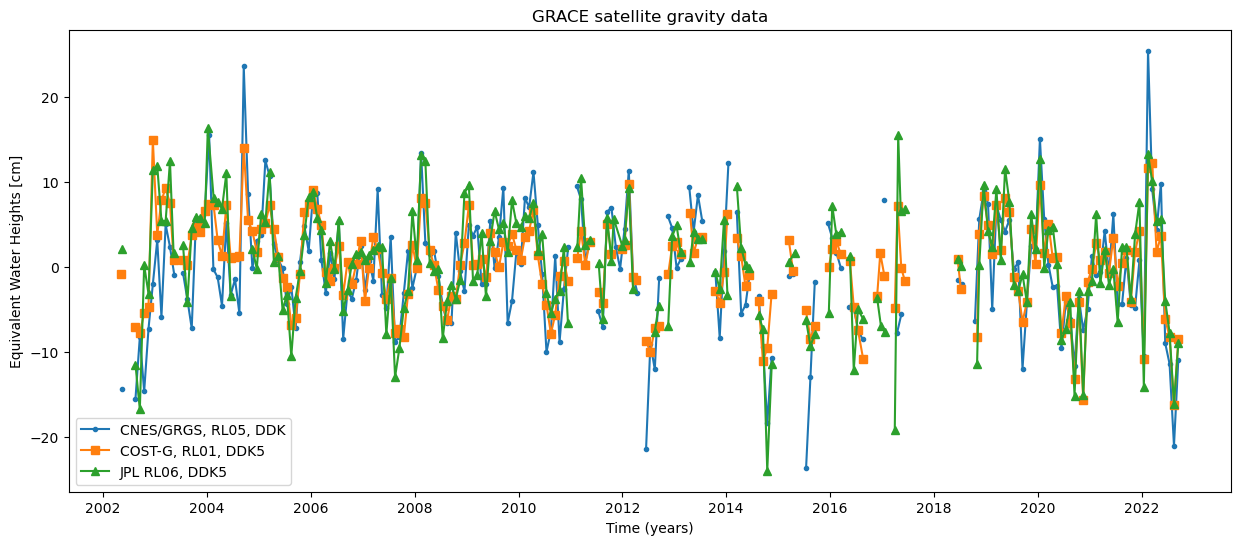

In [53]:
fig, ax = plt.subplots(figsize=(15,6))
cnes_grgs['Equivalent Water Heights (cm)'].plot(marker='.', label='CNES/GRGS, RL05, DDK')
ax.xaxis.set_major_locator(MaxNLocator(nbins=12, integer=True))
ax.set_ylabel('Equivalent Water Heights [cm]')
cost_g['Equivalent Water Heights (cm)'].plot(marker='s', label='COST-G, RL01, DDK5')
jpl['Equivalent Water Heights (cm)'].plot(marker='^', label='JPL RL06, DDK5')
ax.set_title('GRACE satellite gravity data')
ax.legend()


### GRACE (Gravity  Recovery And Climate Experiment)

Grace data is obtained by a pair of satellites which follows each other on a polar orbit. The satellites are situated on a alitude of 500km and a distance of 220 km from each other. The plotted time series are created by three different groups. 

- CNES/GRGS: French National Space Center/ Research Group for Space Geodesy in Toulouse
- COST-G: Combination Service for Time-variable Gravity Fields consortium
- JPL: Jet Propulsion Laboratory, in Pasadena, California

As can be seen, the COST-G model shows peaks with less magnitude compared to the other 2 models. 

Overall, the water height is changing within a year.

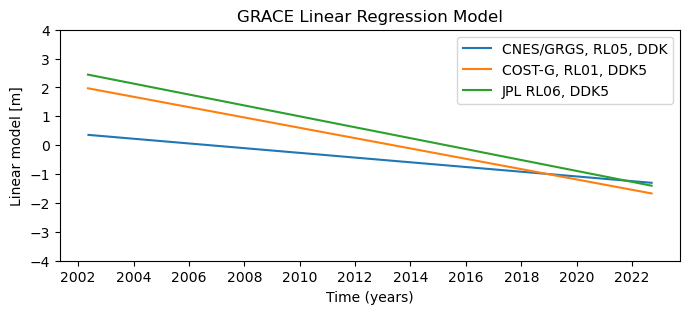

In [15]:
fig, ax = plt.subplots(figsize=(8,3))
cnes_grgs['Linear model (cm)'].plot( label='CNES/GRGS, RL05, DDK')
ax.xaxis.set_major_locator(MaxNLocator(nbins=12, integer=True))
ax.set_ylabel('Linear model [m]')
cost_g['Linear model (cm)'].plot(label='COST-G, RL01, DDK5')
jpl['Linear model (cm)'].plot(label='JPL RL06, DDK5')
ax.set_title('GRACE Linear Regression Model')
ax.legend()
ax.set_ylim((-4, 4));

All three models show a decreasing trend in water height over past 20 years. 